# Машинное обучение, ФКН ВШЭ

# Семинар 6

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Разреженные матрицы

Разреженная матрица — это матрица, большинство элементов которой равны нулю. Такие матрицы возникают во многих областях науки, в том числе и в машинном обучении.

Для разреженных матриц можно определить следующие характеристики:
- разреженность (sparsity) — доля нулевых элементов матрицы,
- плотность (density) — доля ненулевых элементов матрицы, или $1 - \text(sparsity)$.

Для разреженных матриц существуют специальные способы их хранения в памяти компьютера, при которых хранятся только ненулевые значения, тем самым сокращается объём занимаемой памяти. Эти способы реализованы в библиотеке [scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html). Кроме того, разреженные матрицы поддерживаются большинством реализаций методов машинного обучения.

In [2]:
import numpy as np
import scipy.sparse as sp

### COOrdinate format

[Координатный формат](http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html#scipy.sparse.coo_matrix) задаёт матрицу при помощи троек (индекс строки, индекс столбца, значение элемента), описывающих ненулевые элементы матрицы. Как правило, тройки сортируют по индексу строки, а затем индексу столбца для ускорения работы. 

Объём занимаемой памяти — $O(n),$ где $n$ — число ненулевых элементов в матрице.

In [3]:
m = (np.arange(9) + 1).reshape(3,3)
print m
sparse_m = sp.coo_matrix(m)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [4]:
for i in range(len(sparse_m.data)):
    print '(%d, %d, %d)' % (sparse_m.row[i], sparse_m.col[i], sparse_m.data[i])

(0, 0, 1)
(0, 1, 2)
(0, 2, 3)
(1, 0, 4)
(1, 1, 5)
(1, 2, 6)
(2, 0, 7)
(2, 1, 8)
(2, 2, 9)


Для матрицы, содержащей нулевые элементы, имеем:

In [5]:
m = np.eye(3)*np.arange(1,4)
print m
sparse_m = sp.coo_matrix(m)

[[ 1.  0.  0.]
 [ 0.  2.  0.]
 [ 0.  0.  3.]]


In [6]:
for i in range(len(sparse_m.data)):
    print '(%d, %d, %d)' % (sparse_m.row[i], sparse_m.col[i], sparse_m.data[i])

(0, 0, 1)
(1, 1, 2)
(2, 2, 3)


### Compressed Sparse Row matrix

[CSR формат](http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix) - разреженная по строчкам матрица. 

<img src="images/arrays.png">

Формат задаёт матрицу при помощи трёх массивов:
1. $i$-ый элемент первого массива соответствует $i$-ой строке и содержит индекс некоторого элемента во втором массиве,
2. во втором массиве по порядку для каждой строки записаны индексы столбцов ненулевых элементов,
3. третий массив имеет такую же длину, как и второй, и содержит значения соответствующих ненулевых элементов.

Обозначим описанные массивы $a,b,c$. Для получения элемента матрицы на позиции $(i, j)$ необходимо осуществить следующую последовательность действий:
1. Получить значения $a[i]=k_{left}, a[i+1]=k_{right}$.
2. Тогда индексы столбцов ненулевых элементов $i$-ой строки будут находиться в "подмассиве" $b[k_{left}:k_{right}]$.
3. В цикле перебираем элементы подмассива $b[k_{left}:k_{right}]$, пока не встретим элемент, равный $j$.
4. Если такой элемент обнаружен на позиции $m$ (в терминах массива $b$), то ответом является значение $c[m]$.
5. Иначе ответом является 0.если мы не встретили элемент, равный $j$, то возвращаем $0$.

Объём занимаемой памяти — $O(n)$, где $n$ - число ненулевых элементов.

In [7]:
m = (np.arange(9) + 1).reshape(3,3)
print m
sparse_m = sp.csr_matrix(m)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [8]:
print 'a', sparse_m.indptr
print 'b', sparse_m.indices
print 'c', sparse_m.data

a [0 3 6 9]
b [0 1 2 0 1 2 0 1 2]
c [1 2 3 4 5 6 7 8 9]


Для матрицы, содержащей нулевые элементы:

In [9]:
m = np.tril(np.arange(1,4))
print m
sparse_m = sp.csr_matrix(m)

[[1 0 0]
 [1 2 0]
 [1 2 3]]


In [10]:
print 'a', sparse_m.indptr
print 'b', sparse_m.indices
print 'c', sparse_m.data

a [0 1 3 6]
b [0 0 1 0 1 2]
c [1 1 2 1 2 3]


### Compressed Sparse Column matrix

[CSC формат](http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.html#scipy.sparse.csc_matrix) - разреженная по столбцам матрица. 

Формат CSC задаёт матрицу аналогично формату CSR, но при этом элементы первого массива соответствуют столбцам, а не строкам.

Объём занимаемой памяти — $O(n)$, где $n$ - число ненулевых элементов.

In [11]:
m = (np.arange(9) + 1).reshape(3,3)
print m
sparse_m = sp.csc_matrix(m)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [12]:
print 'a', sparse_m.indptr
print 'b', sparse_m.indices
print 'c', sparse_m.data

a [0 3 6 9]
b [0 1 2 0 1 2 0 1 2]
c [1 4 7 2 5 8 3 6 9]


In [13]:
m = np.tril(np.arange(1,4))
print m
sparse_m = sp.csc_matrix(m)

[[1 0 0]
 [1 2 0]
 [1 2 3]]


In [14]:
print 'a', sparse_m.indptr
print 'b', sparse_m.indices
print 'c', sparse_m.data

a [0 3 5 6]
b [0 1 2 1 2 2]
c [1 1 1 2 2 3]


## Умножение разреженных матриц

Как мы убедились, объём занимаемой памяти практически не отличается для всех вариантов хранения разреженных матриц. В таком случае использование какого из вариантов даёт больше преимуществ? Оказывается, что все три способа кардинально различаются по времени умножения матриц.

Для начала вспомним правило умножения матриц:
$$C = A\cdot B$$
$$C_{ij} = \sum_k A_{ik}B_{kj}$$

Для нахождения элемента $C_{ij}$ необходимо получить $i$-ую строчку матрицы $A$ и $j$-ый столбец матрицы $B$. Исследуем время выполнения этих операций для каждого из форматов:

- **COO.** Стоимость получения строки — $O(n)$. Стоимость получения столбца — $O(n)$. При условии, что тройки отсортированы, время поиска можно сократить, воспользовавшись бинарным поиском.
- **CSR.** Стоимость получения строки — $O(1)$. Стоимость получения столбца — $O(n)$.
- **CSC.** Стоимость получения строки — $O(n)$. Стоимость получения столбца — $O(1)$.

Таким образом, время перемножения матриц будет оптимальным, если матрица $A$ задаётся в формате CSR, а матрица $B$ — в формате CSC.

## Разреженные матрицы в линейных моделях

Рассмотрим задачу линейной регрессии с функционалом качества MSE:

$$Q = ||Xw - y||^2 \rightarrow \min_{w}.$$

Как уже говорилось на предыдущих семинарах, вместо нахождения оптимального значения вектора $w$ используют градиентные методы оптимизации функционала. Запишем формулу его градиента:

$$\frac{\partial Q}{\partial w} = 2X^T(Xw - y).$$

Заметим, что матрица $X$, заданная в формате CSR, может быть представлена как $X^T$ в формате CSC (действительно, используя те же массивы, мы можем придать им "симметричный" смысл).

Рассмотрим, как осуществляется умножение разреженной матрицы $A$ на вектор $z$:

1) **CSR**
$$(Az)_{i} = \sum_{k}A_{ik}z_k.$$

Для матрицы в формале CSR обращение к строчкам матрицы выполняется за $O(1)$, поэтому перемножение выполняется за $O(n)$, где $n$ - кол-во ненулевых элементов матрицы $X$.
    
2) **CSC** 

Для матрицы в формате CSC обращение к строчкам матрицы выполняется за $O(n)$. В этом случае умножение будем производить следующим образом:
    - Аллоцируем результирующий вектор, который предварительно заполним нулями. 
    - Обращаемся к $i$-ому столбцу матрицы $A$ и $i$-ому элементу вектора $z$.
    - Каждый ненулевой элемент в столбце домножаем на $z_i$ и добавляем результат к соответствующему значению результирующего вектора.
    
Итого, для умножения разреженной матрицы на вектор получаем следующую асимптотику:
 - $O(l)$ по памяти;
 - $O(n)$ по времени.

Таким образом, мы описали процедуру умножения разреженной матрицы на вектор, и теперь её можно применить для вычисления градиента в задачах с разреженными матрицами "объект-признак".

## Работа с текстовыми данными

Разреженные матрицы имеют место в машинном обучении, в частности, в задачах обработки текстов. 

Как правило, модели машинного обучения действуют в предположении, что матрица "объект-признак" является вещественнозначной, поэтому при работе с текстами сперва для каждого из них необходимо составить его признаковое описание. Для этого широко используются техники векторизации, tf-idf и пр. Рассмотрим их на примере [датасета](https://www.dropbox.com/s/18i7lqac9rr4pnx/banki_responses.json.bz2?dl=0) отзывов о банках.

Сперва загрузим данные:

In [15]:
import json

import bz2
import regex
from tqdm import tqdm

In [16]:
responses = []
with bz2.BZ2File('banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked']:
            responses.append(resp)

201030it [03:00, 1112.37it/s]


Данные содержат тексты отзывов о банках, некоторую дополнительную информацию, а также оценку банка от 1 до 5. Посмотрим на пример отзыва:

In [17]:
interesting_responses = filter(lambda r: u'отвратительно' in r['text'], responses)
print interesting_responses[0]['text']

Банк отказывается возвращать депозит после окончания срока действия договора. Предлагает обращаться в ЦО, где в порядке живой очереди можно забирать не более 500$/день в порядке живой очереди. Налицо отвратительное отношение к вкладчикам. Советую всем обращаться с жалобой в ЦБ и роспотребнадзор.


Приведём текст отзыва в нижний регистр, а также избавимся от всех символов, кроме кириллицы:

In [18]:
print regex.sub(ur'[^\p{Cyrillic}]', ' ', interesting_responses[0]['text'].lower())

банк отказывается возвращать депозит после окончания срока действия договора  предлагает обращаться в цо  где в порядке живой очереди можно забирать не более      день в порядке живой очереди  налицо отвратительное отношение к вкладчикам  советую всем обращаться с жалобой в цб и роспотребнадзор 


Сформируем выборку отзывов, предобработав их аналогичным образом, и вектор ответов:

In [19]:
responses = filter(lambda r: r['rating_grade'] is not None, responses)
texts = map(lambda r: regex.sub(ur'[^\p{Cyrillic}]', ' ', r['text'].lower()), responses)
ratings = map(lambda r: r['rating_grade'], responses)

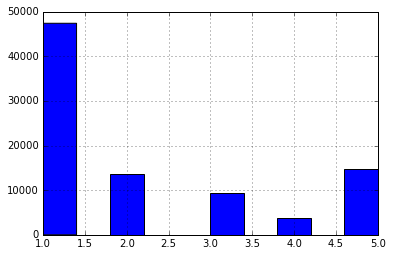

In [20]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.hist(ratings)
plt.grid()

### Векторизация

Самый очевидный способ формирования признакового описания текстов — векторизация. Пусть у нас имеется коллекция текстов $D = \{d_i\}_{i=1}^l$ и словарь всех слов, встречающихся в выборке $V = \{v_j\}_{j=1}^d.$ В этом случае некоторый текст $d_i$ описывается вектором $(x_{ij})_{j=1}^d,$ где
$$x_{ij} = \sum_{v \in d_i} [v = v_j].$$

Таким образом, текст $d_i$ описывается вектором количества вхождений каждого слова из словаря в данный текст.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
vectorizer = CountVectorizer(encoding='utf8', min_df=5)
_ = vectorizer.fit(texts)

Результатом является разреженная матрица.

In [23]:
vectorizer.transform(texts[:1])

<1x72477 sparse matrix of type '<type 'numpy.int64'>'
	with 166 stored elements in Compressed Sparse Row format>

In [24]:
print vectorizer.transform(texts[:1]).indptr
print vectorizer.transform(texts[:1]).indices
print vectorizer.transform(texts[:1]).data

[  0 166]
[ 1314  1842  1843  1846  1917  2672  2804  2977  3187  3262  3831  3862
  3863  3864  5324  5339  5354  6100  6119  6509  6652  6982  7024  7698
  8477  8522  8523  8895  8995 10656 10685 10692 10712 11245 11941 12082
 12408 13565 13619 13620 14154 14940 16054 16082 16226 17106 17752 18197
 18584 19698 20584 20936 20937 20967 21257 21520 22045 22141 22376 23163
 23241 23460 24523 26125 26148 26763 26840 26889 26890 26891 26892 26937
 27673 28023 28658 29869 30470 32743 34358 35198 37304 37363 37610 37687
 37853 37944 37998 39345 40300 41288 41765 42128 42282 42681 42717 44133
 44559 44881 45301 45343 45578 45691 45881 46121 46309 47329 47868 47918
 48642 49433 50104 50979 51905 52268 52397 52656 53267 53269 54002 54776
 56797 57464 57715 57749 58252 58422 58625 59542 59570 59573 59592 59704
 60046 60655 60657 60965 60996 61003 61794 61924 61928 61988 62255 62672
 63116 63684 63686 63926 63996 64379 64480 64572 64607 64613 66307 66654
 68632 69825 69845 69858 70320 70516 7081

### TF-IDF

Ещё один способ работы с текстовыми данными — [TF-IDF](https://en.wikipedia.org/wiki/Tf–idf) (**T**erm **F**requency–**I**nverse **D**ocument **F**requency). Рассмотрим коллекцию текстов $D$.  Для каждого уникального слова $t$ из документа $d \in D$ вычислим следующие величины:

1. Term Frequency – количество вхождений слова в отношении к общему числу слов в тексте:
$$\text{tf}(t, d) = \frac{n_{td}}{\sum_{t \in d} n_{td}},$$
где $n_{td}$ — количество вхождений слова $t$ в текст $d$.
1. Inverse Document Frequency
$$\text{idf}(t, D) = \log \frac{\left| D \right|}{\left| \{d\in D: t \in d\} \right|},$$
где $\left| \{d\in D: t \in d\} \right|$ – количество текстов в коллекции, содержащих слово $t$.

Тогда для каждой пары (слово, текст) $(t, d)$ вычислим величину:
$$\text{tf-idf}(t,d, D) = \text{tf}(t, d)\cdot \text{idf}(t, D).$$

Отметим, что значение $\text{tf}(t, d)$ корректируется для часто встречающихся общеупотребимых слов при помощи значения $\text{idf}(t, D).$

Признаковым описанием одного объекта $d \in D$ будет вектор $\bigg(\text{tf-idf}(t,d, D)\bigg)_{t\in V}$, где $V$ – словарь всех слов, встречающихся в коллекции $D$.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
vectorizer = TfidfVectorizer(encoding='utf8', min_df=5)
_ = vectorizer.fit(texts)

На выходе получаем разреженную матрицу.

In [27]:
vectorizer.transform(texts[:1])

<1x72477 sparse matrix of type '<type 'numpy.float64'>'
	with 166 stored elements in Compressed Sparse Row format>

In [28]:
print vectorizer.transform(texts[:1]).indptr
print vectorizer.transform(texts[:1]).indices
print vectorizer.transform(texts[:1]).data

[  0 166]
[72055 71338 70891 70814 70516 70320 69858 69845 69825 68632 66654 66307
 64613 64607 64572 64480 64379 63996 63926 63686 63684 63116 62672 62255
 61988 61928 61924 61794 61003 60996 60965 60657 60655 60046 59704 59592
 59573 59570 59542 58625 58422 58252 57749 57715 57464 56797 54776 54002
 53269 53267 52656 52397 52268 51905 50979 50104 49433 48642 47918 47868
 47329 46309 46121 45881 45691 45578 45343 45301 44881 44559 44133 42717
 42681 42282 42128 41765 41288 40300 39345 37998 37944 37853 37687 37610
 37363 37304 35198 34358 32743 30470 29869 28658 28023 27673 26937 26892
 26891 26890 26889 26840 26763 26148 26125 24523 23460 23241 23163 22376
 22141 22045 21520 21257 20967 20937 20936 20584 19698 18584 18197 17752
 17106 16226 16082 16054 14940 14154 13620 13619 13565 12408 12082 11941
 11245 10712 10692 10685 10656  8995  8895  8523  8522  8477  7698  7024
  6982  6652  6509  6119  6100  5354  5339  5324  3864  3863  3862  3831
  3262  3187  2977  2804  2672  1917  184

Заметим, что оба метода возвращают вектор длины 72477 (размер нашего словаря).

## Лемматизация и стемминг

Заметим, что одно и то же слово может встречаться в различных формах (например, "сотрудник" и "сотрудника"), но описанные выше методы интерпретируют их как различные слова, что делает признаковое описание избыточным. Устранить эту проблему можно при помощи **лемматизации** и **стемминга**.

### Стемминг

[**Stemming**](https://en.wikipedia.org/wiki/Stemming) –  это процесс нахождения основы слова. В результате применения данной процедуры однокоренные слова, как правило, преобразуются к одинаковому виду.

**Примеры стемминга:**

| Word        | Stem           |
| ----------- |:-------------:|
| вагон | вагон |
| вагона | вагон |
| вагоне | вагон |
| вагонов | вагон |
| вагоном | вагон |
| вагоны | вагон |
| важная | важн |
| важнее | важн |
| важнейшие | важн |
| важнейшими | важн |
| важничал | важнича |
| важно | важн |

[Snowball](http://snowball.tartarus.org/) – фрэймворк для написания алгоритмов стемминга. Алгоритмы стемминга отличаются для разных языков и используют знания о конкретном языке – списки окончаний для разных чистей речи, разных склонений и т.д. Пример алгоритма для русского языка – [Russian stemming](http://snowballstem.org/algorithms/russian/stemmer.html).

In [29]:
import nltk

In [30]:
stemmer = nltk.stem.snowball.RussianStemmer()
print stemmer.stem(u'машинное'), stemmer.stem(u'обучение')

машин обучен


In [31]:
def stem_text(text, stemmer):
    tokens = text.split()
    return ' '.join(map(lambda w: stemmer.stem(w), tokens))

stemmed_texts = []
for t in tqdm(texts[:1000]):
    stemmed_texts.append(stem_text(t, stemmer))

100%|██████████| 1000/1000 [00:26<00:00, 37.22it/s]


In [32]:
print texts[4]

для оплаты коммунальных платежей пользуюсь пластиковой картой и сайтом банка  с некоторых пор оплатить отчисления на капремонт стало невозможно  программа требует ввести лицевой счет  это номер квартиры   а после ввода пишет что счет не найден  при внешнем переводе из другого банка сумма возвращается обратно  т к  счет не найден  прошу проверить наличие счета                      и возможность его пополнения 


In [33]:
print stemmed_texts[4]

для оплат коммунальн платеж польз пластиков карт и сайт банк с некотор пор оплат отчислен на капремонт стал невозможн программ треб ввест лицев счет эт номер квартир а посл ввод пишет что счет не найд при внешн перевод из друг банк сумм возвраща обратн т к счет не найд прош провер налич счет и возможн ег пополнен


In [34]:
len(texts)

88658

К сожалению, стеммер русского языка работает довольно медленно, – 1000 отзывов обрабатываются за 26 секунд, поэтому время обработки всей выборки можно грубо оценить в 40 минут. В связи с этим в рамках семинара мы не будем проводить полную обработку всей выборки, однако вы можете проверить результат работы самостоятельно.

### Лемматизация

[Лемматизация](https://en.wikipedia.org/wiki/Lemmatisation) — процесс приведения слова к его нормальной форме (**лемме**):
- для существительных — именительный падеж, единственное число;
- для прилагательных — именительный падеж, единственное число, мужской род;
- для глаголов, причастий, деепричастий — глагол в инфинитиве.

## Классификация

Воспользуемся изученными методами обработки текстов для решения задачи классификации отзывов на отзывы с положительной оценкой и отзывы с отрицательной оценкой. Будем считать отзывы с оценками 4-5 положительными, а остальные — отрицательными.

In [35]:
vectorizer = CountVectorizer(encoding='utf8', min_df=5)
_ = vectorizer.fit(texts)

In [36]:
X = vectorizer.transform(texts)
Y = (np.array(ratings) > 3).astype(int)

In [37]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

In [38]:
cv = ShuffleSplit(X.shape[0], n_iter=1, test_size=0.3)
for train_ids, test_ids in cv:
    lr = LogisticRegression()
    lr.fit(X[train_ids], Y[train_ids])
    preds = lr.predict(X[test_ids])
    print 'ROC-AUC: %.3f, ACC: %.3f' % (roc_auc_score(Y[test_ids], preds), accuracy_score(Y[test_ids], preds))

ROC-AUC: 0.897, ACC: 0.937


In [39]:
vectorizer = TfidfVectorizer(encoding='utf8', min_df=5)
_ = vectorizer.fit(texts)

In [40]:
X = vectorizer.transform(texts)
Y = (np.array(ratings) > 3).astype(int)

In [41]:
cv = ShuffleSplit(X.shape[0], n_iter=1, test_size=0.3)
for train_ids, test_ids in cv:
    lr = LogisticRegression()
    lr.fit(X[train_ids], Y[train_ids])
    preds = lr.predict(X[test_ids])
    print 'ROC-AUC: %.3f, ACC: %.3f' % (roc_auc_score(Y[test_ids], preds), accuracy_score(Y[test_ids], preds))

ROC-AUC: 0.883, ACC: 0.942


## Важность признаков

Как уже упоминалось ранее, веса признаков в линейной модели в случае, если признаки отмасштабированы, характеризуют степень их влияния на значение целевой переменной. В задаче классификации текстов, кроме того, признаки являются хорошо интерпретируемыми, поскольку каждый из них соответствует конкретному слову. Изучим влияние конкретных слов на значение целевой переменной:

In [42]:
f_weights = zip(vectorizer.get_feature_names(), lr.coef_[0])
f_weights = sorted(f_weights, key=lambda i: i[1])
for i in range(1,30):
    print '%s, %.2f' % f_weights[-i]
    
print '...'
for i in reversed(range(1,30)):
    print '%s, %.2f' % f_weights[i]

спасибо, 13.79
приятно, 10.07
благодарность, 9.34
быстро, 8.33
доволен, 7.07
поблагодарить, 6.38
очень, 6.02
оперативно, 5.62
оперативность, 5.41
всегда, 5.09
очередей, 4.92
все, 4.76
молодцы, 4.74
вопросы, 4.72
понравилось, 4.64
удобно, 4.53
выразить, 4.49
нравится, 4.49
отметить, 4.30
вежливо, 4.14
хочу, 4.13
большое, 4.10
проблем, 4.07
пользуюсь, 3.96
ткс, 3.94
сразу, 3.91
оценку, 3.91
надеюсь, 3.87
банков, 3.87
...
нормально, -2.53
наконец, -2.58
говорят, -2.59
ничего, -2.59
могут, -2.64
завтра, -2.66
вопрос, -2.66
звонки, -2.67
что, -2.72
пор, -2.72
клиентов, -2.82
часа, -2.91
нельзя, -2.98
звоню, -3.01
ладно, -3.01
невозможно, -3.02
сказали, -3.03
опять, -3.04
видимо, -3.06
якобы, -3.07
должен, -3.15
ответа, -3.21
сегодня, -3.35
никто, -3.44
нет, -3.54
зачем, -3.98
вы, -3.99
почему, -4.13
ответ, -4.66
